In [ ]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt

In [ ]:
df = pd.read_csv('kyphosis.csv')
print(type(df))
df.head() # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.shape
# number of rows= 81, number of columns = 4

(81, 4)

#### Handle the Null Values

In [ ]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

#### Checking the data types

In [ ]:
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [ ]:
r1 = df['Kyphosis'].value_counts()
r1

absent     64
present    17
Name: Kyphosis, dtype: int64

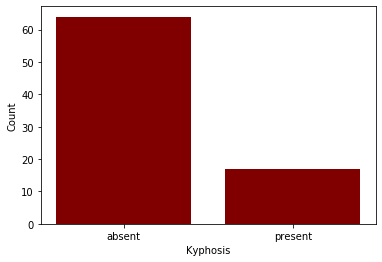

In [ ]:
plt.bar(r1.index,r1,color='maroon')
plt.xlabel('Kyphosis')
plt.ylabel('Count')
plt.show()

#### Selecting the independent and dependent features

In [ ]:
x = df.drop('Kyphosis',axis=1)  # x is independent variable
y = df['Kyphosis']              # y is dependent variable
print(type(x))                  # x is dataframe
print(type(y))                  # y is series
print(x.shape)              
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(81, 3)
(81,)


#### Splitting data into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(x.shape)
print(81*0.25)

(81, 3)
20.25


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 3)
(21, 3)
(60,)
(21,)


#### Creating Functions to compute Confusion matrix, Classification Report and to generate Training and Testing Score

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Accuracy Score\n',accuracy_score(ytest,ypred))
    print('Classification Report\n',classification_report(ytest,ypred))

    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Trainig Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

### Building the Ensemble Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#### 1) Creating the AdaBoost Classifier model

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=8)

ada_boost = AdaBoostClassifier(base_estimator=dt1,n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_split=8),
                   n_estimators=80)

#### 2) Generate the Training and the Testing Score

In [ ]:
mscore(ada_boost)

Training Score 0.9333333333333333
Testing Score 0.9523809523809523


#### 3) Genrating the Predictions

In [ ]:
ypred = ada_boost.predict(x_test)
print(len(ypred))
print(ypred)

21
['absent' 'present' 'absent' 'absent' 'present' 'absent' 'present'
 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'absent' 'absent' 'absent']


#### 4) Evaluate the performance of the model

In [ ]:
eval_model(y_test,ypred)

Confusion Matrix
 [[16  0]
 [ 1  4]]
Accuracy Score
 0.9523809523809523
Classification Report
               precision    recall  f1-score   support

      absent       0.94      1.00      0.97        16
     present       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



#### Save the model

In [ ]:
# Install pickle
# pip install pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(ada_boost, open('ada_boost.pkl', 'wb'))   # wb = write binary

#### Load the Model

In [ ]:
loaded_model = pickle.load(open('ada_boost.pkl', 'rb'))  # rb = read binary

In [ ]:
test_acc = loaded_model.score(x_test, y_test)
print(test_acc)

0.9523809523809523
